# 태양 흑점 data 분석  및 ADF (Augmented Dickey–Fuller) Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## 태양 흑점 data 의 계절성, 자기 상관성 분석

- 1749 년 부터 매월 말 흑점 갯수를 기록한 data  

In [2]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/Sunspots.csv'
df = pd.read_csv(url, skiprows=0, index_col=0) # 첫 줄은 header이므로 skip 
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


&nbsp;

Date 열의 데이터 타입을 날짜 시간(datetime)으로 변환하고, 인덱스를 해당 열로 설정하여 시계열 데이터로 만듭니다.

In [3]:
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index('Date')

df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


&nbsp;

`asfreq()` 함수는 시계열 데이터의 빈도를 조정하는 데 사용되는 pandas 라이브러리의 함수입니다. 시계열 데이터는 일정한 시간 간격으로 측정된 데이터로 구성되며, 이 시간 간격을 빈도라고 합니다. 예를 들어, 일별로 측정된 데이터와 월별로 측정된 데이터는 서로 다른 빈도를 가지고 있습니다.

데이터의 빈도를 조정하는 작업은 데이터 분석 및 시계열 예측 모델링에서 중요합니다. `asfreq()` 함수를 사용하면 원하는 빈도로 데이터를 조정할 수 있습니다. 이 함수는 다양한 빈도 간 변환을 수행할 수 있으며, 이를 통해 시계열 데이터를 더 쉽게 다룰 수 있습니다.

예를 들어, "Monthly Mean Total Sunspot Number" 열을 월별 빈도로 조정한다면, 일별 또는 연간 데이터를 월별 데이터로 변환할 수 있습니다. 이것은 데이터를 시각화하거나 분석하는 데 편리할 수 있으며, 월별 통계나 패턴을 보다 쉽게 파악할 수 있게 됩니여기서는 "Monthly Mean Total Sunspot Number" 열을 월별 빈도로 조정하고 있습니다.분석할 수 있게 됩니다.

C:\Users\chade\AppData\Local\Temp\ipykernel_21652\2785247391.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series = df["Monthly Mean Total Sunspot Number"].asfreq('1M')


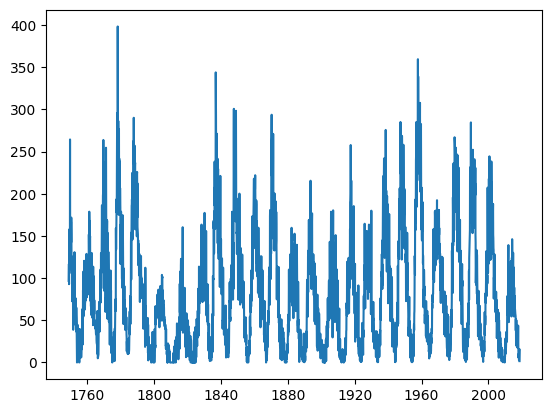

In [4]:
series = df["Monthly Mean Total Sunspot Number"].asfreq('1M')

plt.plot(series)

1995년 1월 1일부터의 데이터를 포함하는 "Monthly Mean Total Sunspot Number" 시계열 데이터를 그래프로 표시합니다. 

<Axes: xlabel='Date'>

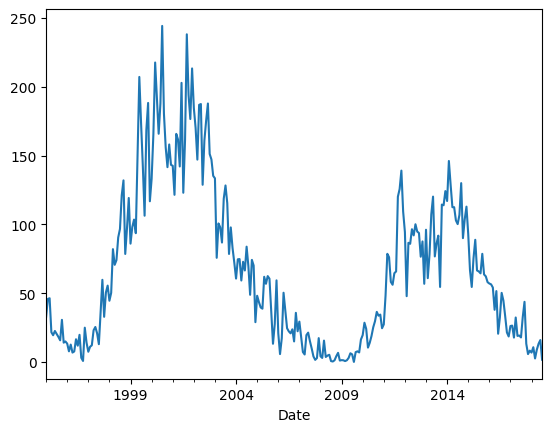

In [5]:
series['1995-01-01':].plot()

`autocorrelation_plot`을 이용하면 "Monthly Mean Total Sunspot Number" 시계열 데이터에 대한 자기상관 그래프가 출력됩니다. 이 그래프를 통해 시계열 데이터의 정상성 및 패턴을 분석할 수 있습니다.

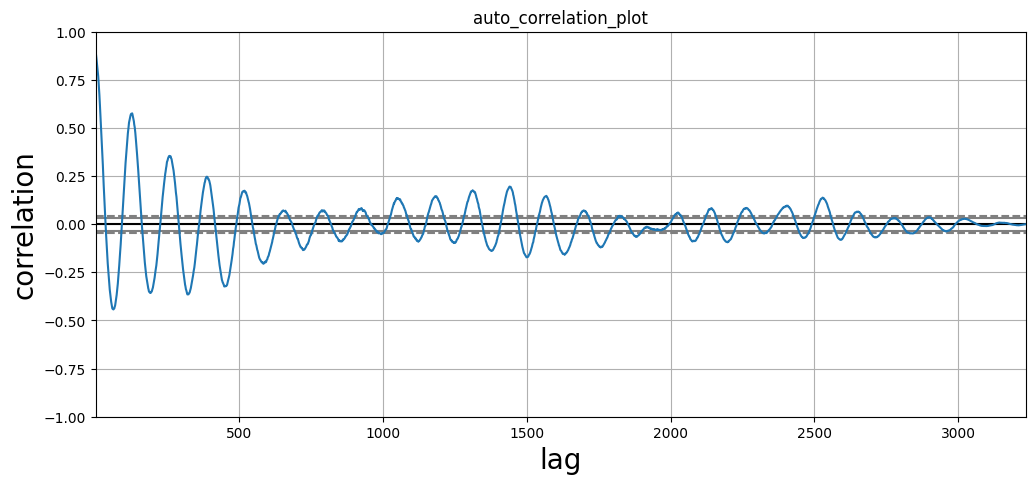

In [6]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12,5))

autocorrelation_plot(series)
plt.title("auto_correlation_plot")
plt.xlabel('lag',fontsize=20)
plt.ylabel('correlation',fontsize=20)
plt.show()

주어진 시계열 데이터에서 초기 관측치에서 큰 자기상관을 보이고 그 이후에는 자기상관이 작아지거나 신뢰 구간에 근접하여 판단이 어려울 때, 시계열 데이터의 정상성을 확인하기 위해 Augmented Dickey-Fuller (ADF) 검정을 사용하는 것이 좋습니다. 위 경우도 초반 500개 관측치에서 큰 자기상관을 보이고 이후에는 신뢰 구간에 근접하여 판단이 어렵습니다.

ADF 검정은 시계열 데이터가 정상성을 가지는지 여부를 판단하는 통계적 검정 방법 중 하나입니다. 정상성을 가지는 시계열 데이터는 시간에 따라 평균과 분산이 일정하며, 시간에 따른 추세나 계절성이 없습니다. 반면, 비정상적인 시계열 데이터는 이러한 특성을 가지지 않을 수 있습니다.

ADF 검정은 다음 가설을 검정합니다:

- 귀무 가설 (H0): 시계열 데이터는 비정상성을 가짐.
- 대립 가설 (H1): 시계열 데이터는 정상성을 가짐.

ADF 검정 결과는 검정 통계량과 유의수준에 따라 귀무 가설을 기각하거나 채택할 수 있습니다. 따라서 ADF 검정을 통해 시계열 데이터가 정상성을 가지는지 여부를 확인하고 추가 분석을 수행할 필요가 있는지를 판단할 수 있습니다.

시계열 데이터가 정상성을 가지지 않는 경우, 데이터 변환, 차분 등의 처리를 통해 정상성을 확보하고 이후 분석을 진행할 수 있습니다.

# Augmented Dickey Fuller test

- 육안으로 time series 의 안정성 (stationary) 여부를 판단하는 것은 어려우므로 library 사용   
    - statsmodel 의 Time Series Analysis (tsa) library 사용  
    - statsmodels.tsa 는 time series analysis 에 유용한 함수들 제공


- ADF Test
    - https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
    
- 반환값
    - adf : 검정 통계량
    - p-value : p-value 추정치
    - critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값

- 태양 흑점 data의 정상성을 check 해 보겠습니다.

`check_for_stationarity` 함수는 주어진 시계열 데이터가 정상성을 가지는지 여부를 판단하기 위해 Augmented Dickey-Fuller (ADF) 검정을 사용하는 함수입니다. ADF 검정은 시계열 데이터의 정상성 여부를 통계적으로 검증하는 방법 중 하나로, 특히 시계열 데이터의 정상성을 확인하고 다음 분석 단계를 결정하는 데 유용합니다.

이 함수는 다음과 같은 단계로 작동합니:

1. 주어진 시계열 데이터 X에 대해 ADF 검정을 수행하고 그 결과의 p-value를 계산합니다. p-value는 귀무 가설이 성립할 확률을 나타내며, 귀무 가설은 "시계열 데이터가 비정상성을 가진다"라는 가설입니다.

2. 계산된 p-value를 주어진 기준값(cutoff)와 비교합니다. 일반적으로 0.05 또는 0.01과 같은 기준값을 사용합니다. 계산된 p-value가 기준값보다 작으면, 귀무 가설을 기각하고 시계열 데이터가 정상성을 가지는 것으로 판단합니다. 즉, 시계열 데이터는 정상성을가집니다.

3. 함수는 시계열 데이터의 이름과 계산된 p-value를 출력하며, 정상성 여부를 반환합니다. 따라서 사용자는 함수의 결과를 통해 주어진 시계열 데이터가 정상성을 가지는지 여부를 확인할

Augmented Dickey-Fuller (ADF) 검정은 시계열 데이터의 정상성을 확인하기 위해 사용되는 통계적 방법입니다. 이 검정은 시계열 데이터의 단위근(unit root) 여부를 테스트하며, 단위근이 없는 경우 시계열 데이터가 정상성이라고 판단합니다.

단위근(Unit Root)은 시계열 데이터에서 흔히 나타나는 특징 중 하나로, 시간에 따라 데이터가 랜덤하게 움직이거나 추세를 가질 때 발생합니다. 단위근을 가진 데이터는 시간에 따라 계속해서 변하는 경향을 보이며, 평균이나 분산이 시간에 따라 일정하지 않습니다. 이러한 특성으로 인해 시계열 데이터가 정상성을 가지지 않는 경우가 많습니다.

정상성을 가지는 시계열 데이터는 단위근이 없으며, 시간에 따라 일정한 특성을 유지합니다. 반면에 단위근을 가진 데이터는 시간에 따라 랜덤하게 움직이거나 추세를 보이며, 정상성을 가지지 않습니다.데 도움이 됩니다.

In [7]:
def check_for_stationarity(data:pd.Series,cutoff:int=0.05)->bool:
    results = adfuller(data)
    p_value = results[1]
    if p_value<cutoff:
        print((f"{p_value} < {cutoff} : The series is Stationary"))
    else:
        print((f"{p_value} > {cutoff} : The series is not Stationary"))    
    
        

In [8]:
check_for_stationarity(series)

1.13703318901185e-18 < 0.05 : The series is Stationary


# Stationarity/Non-Stationarity (정상/비정상)

이 함수는 주어진 평균(mu)과 표준편차(sigma)를 가진 정규분포에서 임의의 데이터 포인트를 생성하는 함수입니다. generate_datapoint() 함수는 다음과 같이 작동합니다:

인수 params는 평균과 표준편차를 포함하는 리스트입니다. np.random.normal(mu, sigma)를 호출하여 평균이 mu이고 표준편차가 sigma인 정규분포에서 임의의 데이터 포인트를 생성하여 반환합니다.

In [9]:
def generate_datapoint(param:list,size:int=1)->np.array:
    mu = param[0]
    sigma = param[1]
    return np.random.normal(mu,sigma,size=size)

In [10]:
generate_datapoint(param = [0,1])

array([0.9554744])

A와 B라는 두 개의 시리즈를 고려해 보겠습니다. Series A는 고정된 매개변수가 있는 stationary 프로세스에서 생성되고 Series B는 시간이 지남에 따라 변경되는 매개변수로 생성됩니다.

### Series A
Series A는 고정된 매개변수를 가지는 정상성 프로세스에서 생성됩니다. 이 프로세스에서는 시간이 지나도 데이터 생성에 영향을 주는 매개변수가 일정합니다. 여기서는 다음과 같은 과정을 거쳐 Series A를 생성합니다:  

1 - 시계열 데이터 A는 100개의 데이터 포인트로 이루어져 있으며, 각 포인트는 정규분포에서 생성된 값입니다.  
2 - 평균이 0이고 표준편차가 1인 정규분포에서 100개의 데이터 포인트를 무작위로 추출하여 생성합니다.  
3 - 이렇게 생성된 데이터 포인트를 0부터 99까지의 인덱스로 가지는 pandas Series 객체 A를 만듭니다.  

Series A는 매개변수가 고정되어 있으므로 시간이 변해도 데이터 생성 과정의 매개변수가 일정하며, 정상성을 가집니다. 따라서 평균과 분산이 시간에 따라 일정한 것을 관찰할 수 있습니다.

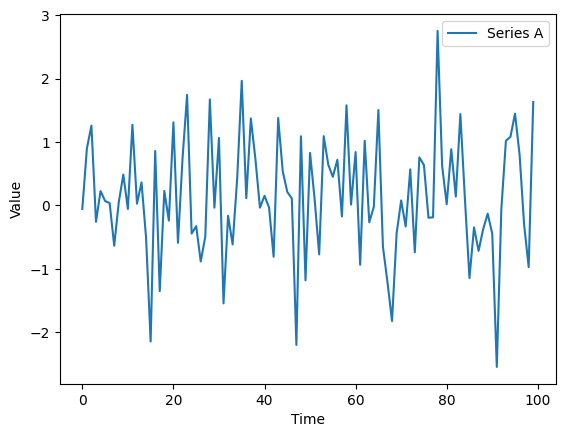

In [11]:
# 매개변수 및 데이터 포인트 수 설정
params = (0, 1)
T = 100

A = pd.Series(index=range(T), dtype=np.float64)
A.name = 'A'

for t in range(T):
    # time이 변하여도 data generating process의
    # parameter가 일정하므로 stationary 임
    A[t] = generate_datapoint(params)

plt.plot(A)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A'])

### Series B

Series B는 시간에 따라 평균이 증가하는 정규분포에서 생성된 100개의 데이터 포인트로 구성된 시계열 데이터입니다. 이 데이터를 생성하기 위해서는 다음과 같은 단계를 따릅니다:

1. 시계열 데이터 B는 100개의 데이터 포인트로 이루어져 있으며, 각 포인트는 정규분포에서 생성된 값입니다.
2. 시간에 따라 변화하는 매개변수를 사용하며, 이 매개변수는 t * 0.1으로 설정됩니다. 즉, 시간 t가 증가함에 따라 매개변수가 증가합니다.
3. 이렇게 설정된 매개변수로 generate_datapoint(params) 함수를 호출하여 데이터 포인트를 생성하고, 데이터 포인트를 0부터 99까지의 인덱스로 가지는 pandas Series 객체 B를 생성합니다.

Series B는 시간이 흐름에 따라 데이터 생성에 사용되는 매개변수가 변하기 때문에, 데이터의 평균값이 시간에 따라 증가하는 특성을 가집니다. 이러한 시계열 데이터는 비정상성을 가지며, 시간에 따른 평균값의 증가를 관찰할 수 있습니다. 비정상 시계열 데이터를 정상화하려면 차분(differencing)과 같은 기법을 사용하여 정상성을 확보하는 작업이 필요합니다.

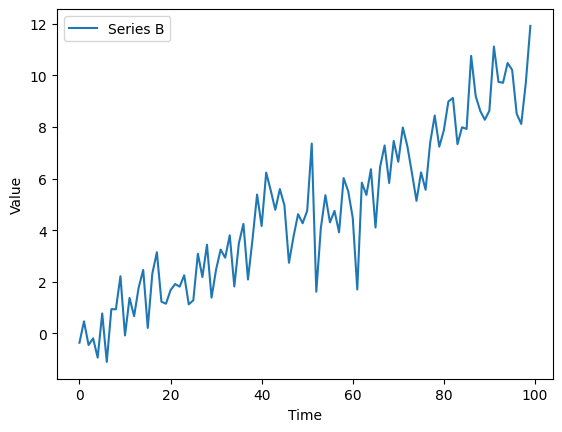

In [12]:
T = 100

B = pd.Series(index = (range(T)),dtype=np.float64)


for idx in range(T):
    param = (idx*0.1,1)
    # print(param)
    B[idx] = generate_datapoint(param=param)
    

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B']);

### 비정상성이 위험한 이유

많은 통계적 테스트에서는 테스트 중인 데이터가 stationary 하다고 가정 합니다. 또한 non-stationary한 데이터 세트에 특정 통계를 순진하게 사용하면 엉터리 결과를 얻게 됩니다. 예를 들어 non-stationary Series B를 통해 평균을 구해 보겠습니다.

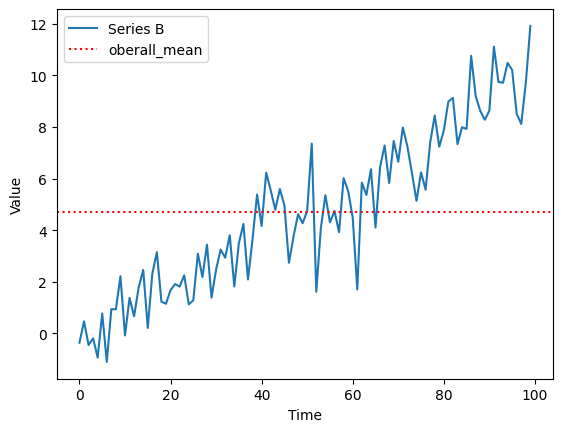

In [13]:
ttl_mean = np.mean(B)

plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.axhline(ttl_mean,color="red",ls=":",label="overall_mean")

plt.legend(['Series B','oberall_mean'])




이 코드는 시계열 데이터 B의 전체 평균을 계산하고, 그래프에 시계열 데이터와 평균을 함께 표시합니다.   

시계열 데이터 B의 전체 평균을 계산하여 변수 m에 저장하고 시각화 하면, Series B와 함께 전체 평균을 나타내는 빨간색 점선이 그래프에 표시됩니다. 이 그래프를 통해 시계열 데이터 B의 평균이 시간에 따라 증가하는 것을 확인할 수 있습니다. 이러한 변화는 비정상 시계열의 특징 중 하나입니다.

계산된 평균은 모든 데이터 포인트의 평균을 나타내지만, 이 평균값은 미래 상태를 예측하는 데 유용하지 않습니다. 이는 시계열 데이터가 시간에 따라 상이한 상태가 혼합되어 있기 때문에 발생하는 문제입니다. 서로 다른 시간에서 얻은 데이터가 혼합되어 있으므로 특정 시점과 비교할 때 의미가 없습니다. 이 예는 시계열 데이터의 비정상성이 분석을 어렵게 만드는 이유를 간단하고 명확하게 보여주는 예시일 뿐이며, 실제로는 훨씬 더 복잡한 문제가 발생할 수 있습니다.

### Testing for Stationarity

이제 통계적 테스트를 사용하여 정상성을 확인합니다.   습니다.

In [14]:
check_for_stationarity(A)
check_for_stationarity(B)

8.911636700858321e-06 < 0.05 : The series is Stationary
0.9615837710254397 > 0.05 : The series is not Stationary


&nbsp;

조금 더 미묘한 문제를 보겠습니다.  
다음 경우는 data generating process의 parameter가 시간 t에 dependent하므로 평균이 시간에 따라 변합니다. 간단히 말해, 다음 코드는 시간이 지남에 따라 사인 함수를 따라 평균이 변하는 정규분포로부터 일련의 데이터 포인트를 생성합니다. 이는 시간 t의 각 단계에서, 평균이 sin(t)로 변하고 표준편차는 동일하게 유지되는 데이터 포인트를 만듭니다.

이렇게 생성된 데이터 시리즈는 시간에 따라 그들의 통계적 특성이 변하기 때문에, '비정상 시계열 데이터'라고 합니다. 이는 데이터의 평균이 시간에 따라 변한다는 것을 의미하며, 이러한 데이터는 분석하기 전에 '차분' 같은 기법을 사용하여 보다 안정된 형태로 변환하는 것이 필요할 수 있습니다. 이 과정은 시계열 데이터 분석에서 중요한 단계 중 하나입니다.

평균의 주기적인 움직임은 무작위 잡음과 구별하기가 매우 어려울 것입니다. 실제로 노이즈가 있는 데이터와 제한된 샘플 크기에서는 시계열이 정상인지,  랜덤 노이즈인지 또는 추세의 일부인지 여부를 결정하기 어려울 수 있습니다. 따라서 이런 경우 adfuller Test 를 통과했다고 모두 stationary는 아닙니다.  

시계열의 underlying 특성을 모를 때는 그냥 stationary로 생각하고 진행합니다.

C:\Users\chade\AppData\Local\Temp\ipykernel_21652\247767230.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.40819126]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  c[t] = generate_datapoint(param=params)


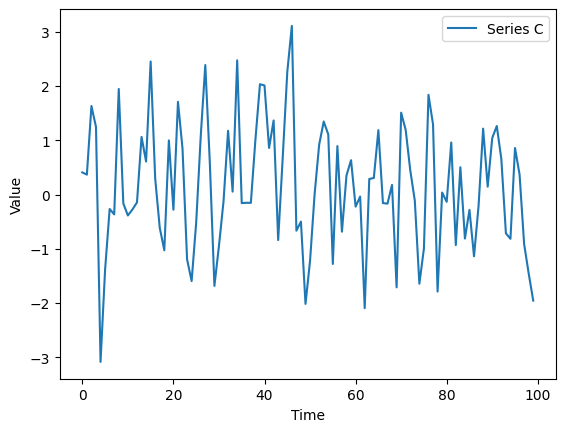

In [21]:
## 데이터 포인터 수 설정
T= 100

c = pd.Series(range(T))

for t in range(T):
    """ 
    시간에 따라 변화하는 매개 변수 입니다.
    """
    params = (np.sin(t),1)

    c[t] = generate_datapoint(param=params)

plt.plot(c)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(["Series C"])



In [22]:
check_for_stationarity(c)

5.131553328155425e-12 < 0.05 : The series is Stationary
